<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/Hall/Hall_zeroB_measurements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab4 Hall: Measurements at zero magnetic field


Evgeny Kolonsky 2025

v.0.1.2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import requests

# The model with misalignment factor $\beta$

$$
U_H' = U_H + \beta U_p + U_0
\tag{1}
$$
where $U_H'$ is observed voltage measured on the Hall pins of the `PHYWE Hall unit`, $U_H$ is "pure" hall voltage, having zero value at zero magnetic field, $U_p$ is longitudal voltage, measured on longitudal pins of the unit, and $U_0$ is Hall voltage offset, which can be modified with `Uh comp` regulator on the unit, and $\beta$ is misalignment factor, explaining longitudal voltage leak to the Hall contacts of the unit.

At zero magnetic field the measured Hall voltage expected to be a linear function of longitudal voltage with slope $\beta$:
$$
U_H' = \beta U_p + U_0, \quad \text{when}\quad B\equiv 0.
\tag{2}
$$


## Misalignment factor $\beta$ as slope $U_H'(U_p)$ at $B = 0$

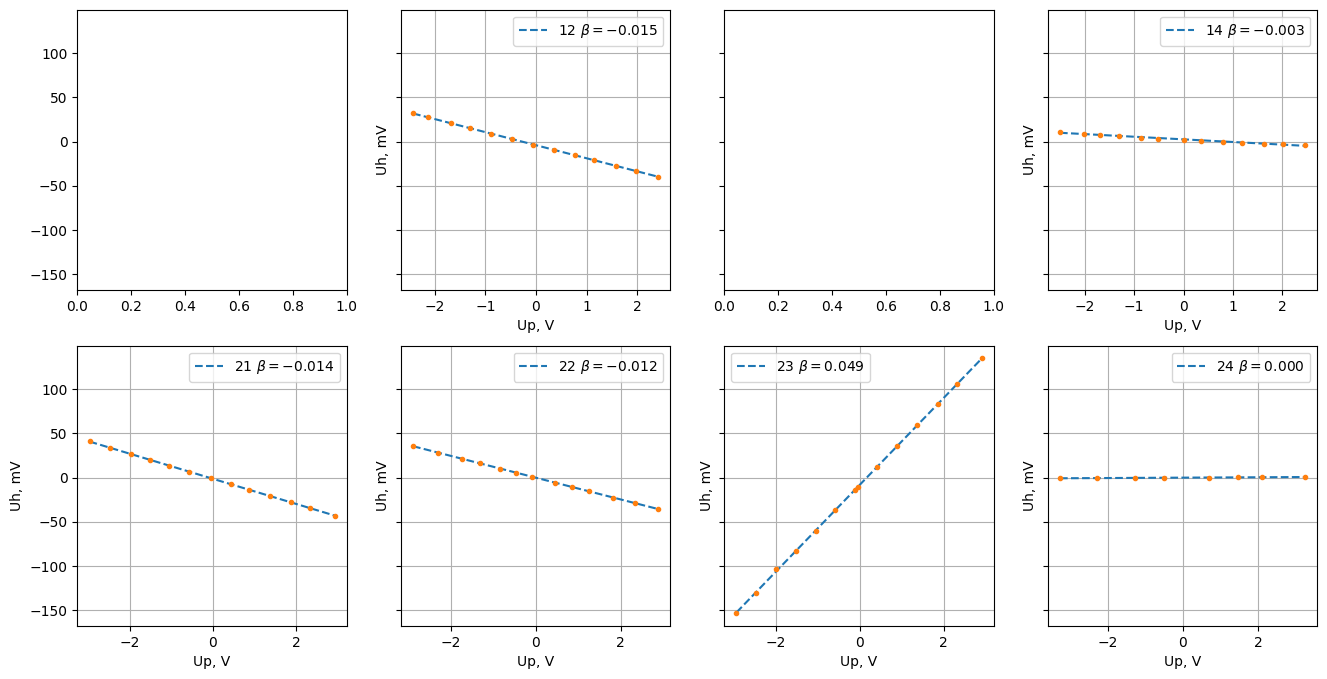

In [3]:
names = ['12',  '14', '21', '22', '23', '24']
fig, ax = plt.subplots(2, 4, figsize=(16, 8), sharey=True)

for name in names:
  url = f'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/Hall/zero{name}.txt'
  response = requests.get(url)
  Ip, Up, Uh = np.genfromtxt(response.text.splitlines()).T
  first_digit  = int(name[:2]) % 10
  second_digit = int(name[:2]) // 10
  axx = ax[second_digit-1, first_digit-1]

  axx.set_xlabel('Up, V')
  axx.set_ylabel('Uh, mV')

  fit = linregress(Up, Uh)
  beta = fit.slope
  axx.plot(Up/1000, fit.intercept + fit.slope *Up, '--', label=rf'{name} $\beta ={beta:.3f}$')
  axx.plot(Up/1000, Uh, '.')
  axx.legend()
  axx.grid()
#ax[0,0].remove()
#ax[0,2].remove()




## Longitudal resistance $R$ as slope $U_p(I_p)$

Current $I_p$ is measured with low accuracy, while  potential voltage $U_p$ is measured with high accuracy. We model current as a linear function of potential voltage:
$$
I_p = \frac{1}{R} U_p + I_0.
$$


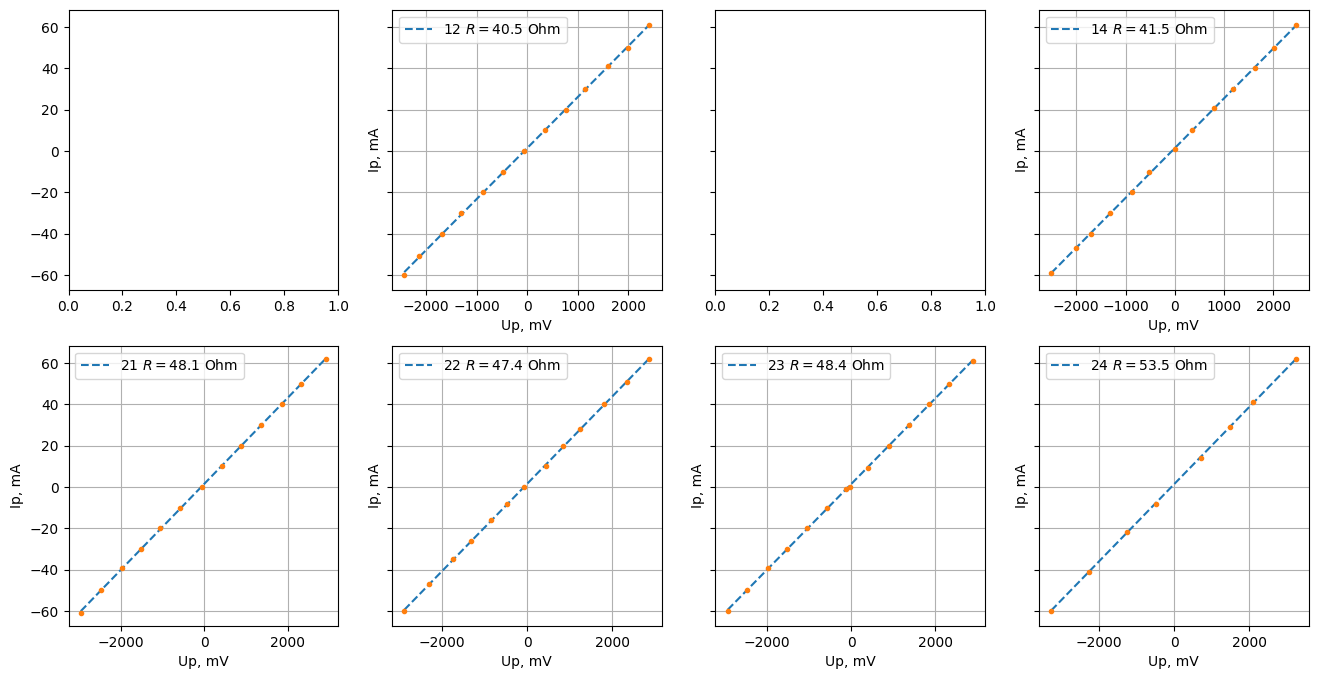

In [6]:
names = ['12',  '14', '21', '22', '23', '24']
fig, ax = plt.subplots(2, 4, figsize=(16, 8), sharey=True)

for name in names:
  url = f'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/Hall/zero{name}.txt'
  response = requests.get(url)
  Ip, Up, Uh = np.genfromtxt(response.text.splitlines()).T
  first_digit  = int(name[:2]) % 10
  second_digit = int(name[:2]) // 10
  axx = ax[second_digit-1, first_digit-1]

  axx.set_ylabel('Ip, mA')
  axx.set_xlabel('Up, mV')

  fit = linregress(Up, Ip)
  R = 1/fit.slope
  I0 = fit.intercept
  Ip_fit = fit.intercept + fit.slope *Up
  axx.plot(Up, Ip_fit , '--', label=rf'{name} $R ={R:.1f}$ Ohm')
  axx.plot(Up, Ip , '.')
  axx.legend()
  axx.grid()
#ax[0,0].remove()
#ax[0,2].remove()



# Sample 23. $R_H$ measurements with zero correction

## Step 1. Zero measuremnts at magnetic field $B=0$




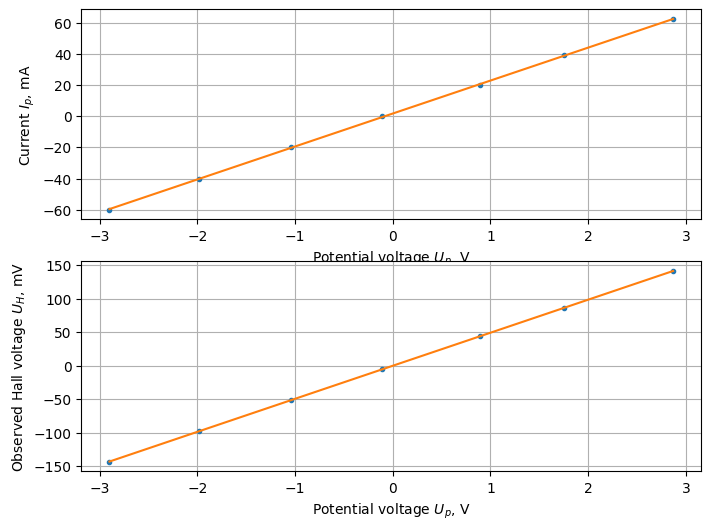

In [28]:
zero = '''
#B = 0
# Ip/mA, Up/mV, Uh/mV
-60 -2900 -143.38
-40 -1983 -97.30
-20 -1046 -51.36
0 -106 -5.25
20 891 43.83
39 1754 86.20
62 2869 141.20
'''

Ip, Up, Uh = np.genfromtxt(zero.splitlines()).T
Ip *= 1e-3
Up *= 1e-3
Uh *= 1e-3

fig, ax = plt.subplots(2, 1, figsize=(8, 6))
fit_conductivity = linregress(Up, Ip)
fit_leak = linregress(Up, Uh)
beta, U0 = fit_leak.slope, fit_leak.intercept

ax[0].plot(Up, Ip*1e3, '.')
ax[0].plot(Up, 1e3*(fit_conductivity.intercept + fit_conductivity.slope * Up))
ax[0].set_xlabel(r'Potential voltage $U_p$, V')
ax[0].set_ylabel(r"Current $I_p$, mA")
ax[0].grid()


ax[1].plot(Up, Uh*1e3, '.')
ax[1].plot(Up, (beta*Up + U0)*1e3)
ax[1].set_xlabel(r'Potential voltage $U_p$, V')
ax[1].set_ylabel(r"Observed Hall voltage $U_H$, mV")
ax[1].grid()


## Step 2. Measurements at non-zero magnetic field

$$
R_H = \frac{U_H \cdot d}{B\cdot I_p}
$$

In [48]:
def weighted_average(values, errors):
  weights = 1 / errors**2
  average  = np.sum(weights * values) / np.sum(weights)
  error_of_average = np.sqrt(1 / np.sum(weights))
  return average, error_of_average

In [16]:
d = 1e-3 # mm

Getting raw data

In [54]:
data = '''
# Ip/mA, Up/mV, Uh/mV, B/mT
30 1350 8.89 302
30 1338 17.45 248
30 1329 25.28 202
29 1320 34.67 150
29 1315 44.11 100
27.5 1244 50.60 54
28 1242 59.74 6
28 1242 71.28 -51
28 1244 80.85 -101
28 1250 90.56 -152
28 1257 99.98 -204
28 1265 109.50 -259
28 1272 116.62 -302
40 1854 12.86 300
30 1394 9.89 298
20 894 6.34 297
10 466 3.29 297
#0 -53 -0.33 297
-10 -574 -3.98 297
-21 -1106 -7.77 297
-30 -1521 -10.76 297
-30 -1507 -19.71 248
-30 -1495 -29.23 198
-30 -1485 -39.64 147
-30 -1479 -49.21 101
-29 -1472 -62.14 44
-30 -1470 -70.53 7
'''
Ip, Up, Uh, B = np.genfromtxt(data.splitlines()).T
Ip *= 1e-3
Up *= 1e-3
Uh *= 1e-3
B *= 1e-3

B_err = 5e-3 # let's assume error in B is 5 mT
B_rel = np.abs(B_err / B)
Ip_err = 1e-3 # let's assume error in Ip is 1 mA
Ip_rel = np.abs(Ip_err / Ip)


Calculating $R_H$ **without** zero correction

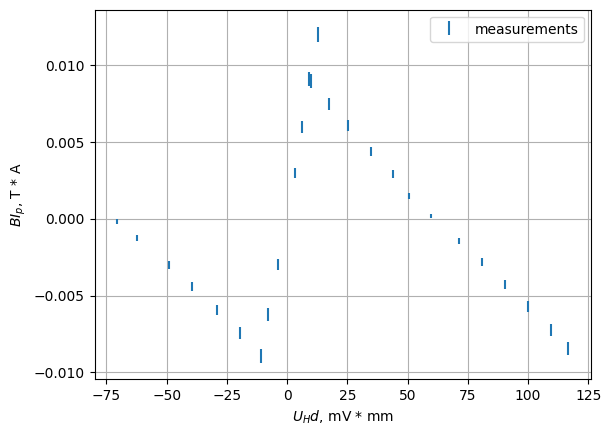

In [62]:
y = B * Ip
# relative error
y_rel = B_rel + Ip_rel
y_err = np.abs(y * y_rel)
# Error by x is negligible
x = Uh * d

plt.errorbar(x*1e6, y, yerr=y_err, linestyle='', label='measurements')
plt.grid()
plt.ylabel(r'$B I_p$, T * A')
plt.xlabel(r'$U_H d$, mV * mm')
plt.legend()



**Conclusion** finding slope $R_H$ is senseless.

Calculating $R_H$ **with** zero correction

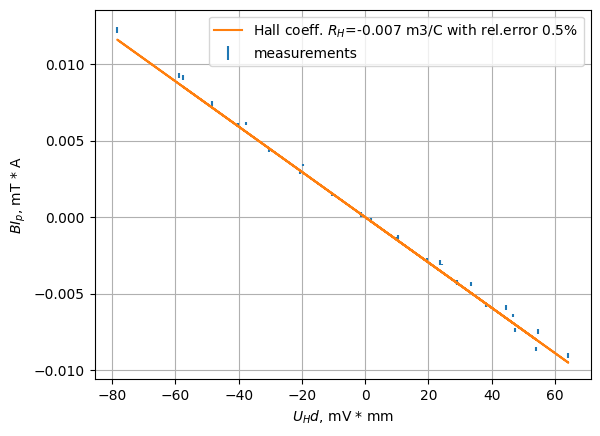

In [61]:
# hall voltage zero correction
Uh_ = Uh - beta * Up - U0

# Accuracy of Ip value could be improved
Ip_ = fit_conductivity.intercept + fit_conductivity.slope * Up

y = B * Ip_
# relative error
y_rel = B_rel
y_err = np.abs(y * y_rel)
# Error by x is negligible
x = Uh_ * d
k, k_error  = weighted_average(y/x, y_err/x)
k_rel = np.abs(k_error / k)
RH = 1 / k
RH_err =  RH * k_rel

plt.errorbar(x*1e6, y, yerr=y_err, linestyle='', label='measurements')
plt.plot(x*1e6, (k * x), label=fr'Hall coeff. $R_H$={RH:.3f} m3/C with rel.error {k_rel*100:.1f}%')
plt.grid()
plt.ylabel(r'$B I_p$, mT * A')
plt.xlabel(r'$U_H d$, mV * mm')
plt.legend()



Reference value $R_H = 7.37 \times 10^{-3} m^3/C$